This notebook analysis a movie recorded on the BF setup and plots the PSD of the particles

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pims
import trackpy as tp
from pims import ImageSequence

In [67]:
def trackpy_movie(movie, size, mmass):
    nf = movie.shape[0]
    f1 = trackpy.batch(movie[:,:,:], size, minmass=5, invert=False, processes='auto')
    t = trackpy.link(f1, 5, memory=0)
    
    t1 = trackpy.filter_stubs(t, 3)

    t2 = t1.rename(columns={'frame':'Frame'})
#     particles = t2['particle'].nunique()
#     print('Unique particles found:', + particles)
    
    # t2.groupby('Frame')['particle'].nunique().plot(kind='line')
    # plt.yticks(np.arange(0, particles+1, 5.0))
    # plt.xticks(np.arange(0, nf+1, 10.0))
    # plt.title('Number of landed particles over the series of frames')
    # plt.xlabel('Frame number')
    # plt.ylabel('Number of particles')
    # plt.grid()
    # plt.show()
    
    nparticles = []
    frames = np.arange(0,nf,1)

    for i in range(nf):
        temp = t2.loc[t2['Frame'] == i]
        nparticles.append(len(temp))

    plt.figure()
    plt.step(frames,nparticles)
    plt.yticks(np.arange(0, max(nparticles)+1, 2.0))
    plt.xticks(np.arange(0, nf+1, 5.0))
    plt.title('Stepfunction number of landed particles over the series of frames')
    plt.xlabel('Frame number')
    plt.ylabel('Number of particles')
    plt.grid()
    plt.show()
    
    t_hist = t2.drop_duplicates(subset=['particle'])
    plt.title('Found Mass Histogram')
    plt.hist(t_hist['mass'])
    plt.show()
    
#     plt.figure()
#     trackpy.annotate(t2[t2['Frame'] == nf-1], movie[nf-1]);
    
#     return t2, t_hist
    return

In [68]:
plt.rcParams['figure.figsize'] = (5, 5)

Choose the location of the video file

In [69]:
video = r"E:\Ingmar\Ingmar\Experimental_data\16092022\1_stuck.avi"

If nessecary, save the individual frames to a separate folder

In [70]:
# container = av.open(video)

# for frame in container.decode(video=0):
#     frame.to_image().save('Images/1609_100nm_1_20000_stuck/frame%d.jpg' % frame.index)
#     frame.to_image()

Read the image save step by counting the number of frames

In [71]:
images = ImageSequence('Images/1609_100nm_1_20000_stuck/frame*.jpg')
length = len(images)
print(length)

1051


Choose the image sequence you would like to further analyse

In [72]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


ImgSeq = gray(pims.open('Images/parafilm_2/*.jpg'))

In [73]:
ImgSeq
num_frames_ImgSeq = len(ImgSeq)

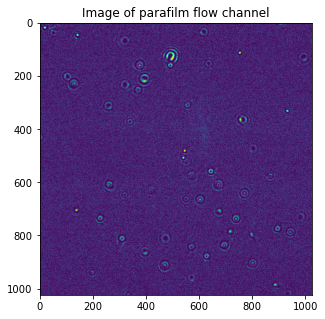

In [74]:
plt.title('Image of parafilm flow channel')
plt.imshow(ImgSeq[300])

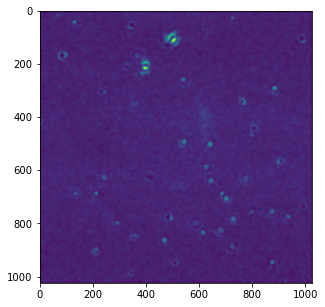

In [75]:
LowPass_Image = tp.preprocessing.lowpass(ImgSeq[450], sigma=4)
plt.imshow(LowPass_Image)

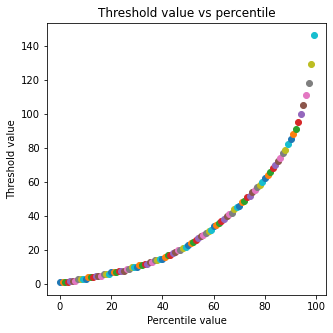

In [76]:
for i in range(0, 100, 1):
    Threshold = tp.find.percentile_threshold(ImgSeq[300], percentile=i)
    plt.scatter(i, Threshold)
    plt.title('Threshold value vs percentile')
    plt.xlabel('Percentile value')
    plt.ylabel('Threshold value')

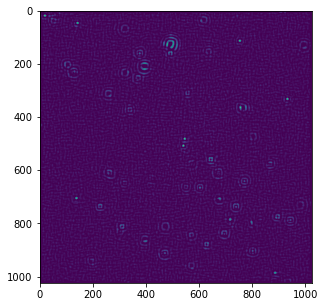

In [77]:
BandPass_Image = tp.preprocessing.bandpass(ImgSeq[300], lshort=4, llong=15)
plt.imshow(BandPass_Image)

In [78]:
plt.rcParams['figure.figsize'] = (7, 7)

Part 1 of 4: determine overall particle counts without filtering

In [ ]:
t_a = tp.batch(ImgSeq[:], 5, separation=25)

plt.title('Raw data: all frames without BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_a['mass'], color='peru')

Part 2 of 4: linking step

In [ ]:
tp.quiet()  # Turn off progress reports for best performance
t_b = tp.link(t_a, 4, memory=2, )

plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_b['mass'], color='peru')

Part 3 of 4: remove spurious particles 

In [ ]:
t_c = tp.filter_stubs(t_b, 10)

plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_c['mass'], color='peru', bins=30)

Part 4 of 4: select specific parameters from data

In [ ]:
t_d = t_c[((t_c['mass'] > 120) & (t_c['size'] < 2.6) &
         (t_c['ecc'] < 0.5))]

plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_d['mass'], color='peru', bins=20)

Change to different sequence below

In [ ]:
startframe = 0
endframe = num_frames_ImgSeq
startframe2 = 1  # +1 for accounting for the moving average
endframe2 = endframe-startframe

bgcorrected2 = ImgSeq[startframe2:endframe2] - np.mean([ImgSeq[startframe2-1:endframe2-1]])

print(bgcorrected2.shape)  # to check the shape of the array(frames,x,y)

In [ ]:
t = tp.batch(bgcorrected2[:], 5)
plt.title('Raw data: all frames with BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t['mass'])

In [ ]:
tp.quiet()  # Turn off progress reports for best performance
t1 = tp.link(t, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t1['mass'])

In [ ]:
t2 = tp.filter_stubs(t1, 15)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t2['mass'])

In [ ]:
t3 = t2[((t2['mass'] > 200) & (t2['size'] < 2.6) &
         (t2['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t3['mass'])